### 线性回归预测发房价(以scikit-learn调用线性回归完整流程)

** 任务 **  
基于usa_housing_price.csv数据，建立线性回归模型，预测合理房价：  
1、以面积为输入变量，建立单因子模型，评估模型表现，可视化线性回归预测结果   
2、以income、house age、numbers of rooms、population、area 为输入变量，建立多因子模型，评估模型表现  
3、预测income = 65000，House Age = 5，Number of Rooms=5，Polulation = 30000，size = 200的合理房价  

In [44]:
#load data
import pandas as pd
import numpy as np
data = pd.read_csv("./data/usa_housing_price.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273544,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


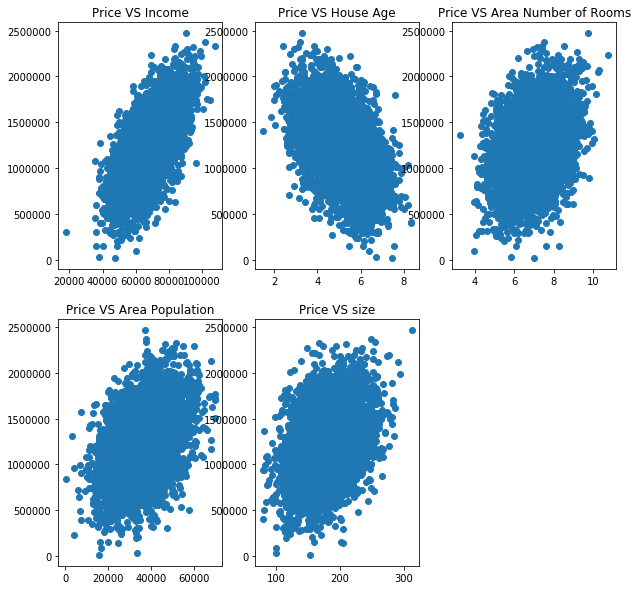

In [46]:
#先用散点图展示下 地区平均收入 和 房价 趋势
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10,10)) # 定义图形大小
fig1 = plt.subplot(231)  #231表示2行3列的第1幅图
plt.scatter(data.loc[:,'Avg. Area Income'],data.loc[:,'Price'])
plt.title('Price VS Income')

fig2 = plt.subplot(232)  
plt.scatter(data.loc[:,'Avg. Area House Age'],data.loc[:,'Price'])
plt.title('Price VS House Age')

fig3 = plt.subplot(233)  
plt.scatter(data.loc[:,'Avg. Area Number of Rooms'],data.loc[:,'Price'])
plt.title('Price VS Area Number of Rooms')

fig4 = plt.subplot(234)  
plt.scatter(data.loc[:,'Area Population'],data.loc[:,'Price'])
plt.title('Price VS Area Population')

fig5 = plt.subplot(235)  
plt.scatter(data.loc[:,'size'],data.loc[:,'Price'])
plt.title('Price VS size')
plt.show()

#### 1.我们先单因子研究下算法，只看size和price的关系

In [47]:
#define X and y
X = data.loc[: ,'size']
y = data.loc[: ,'Price']
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [48]:
(X.shape)# 这里要进行类型转换,X要numpy.array类型，还要是矩阵。dataframe也行

(5000,)

In [27]:
X = np.array(X).reshape(-1,1)#np.array()先转换成列向量，reshape让其变成矩阵(-1,1)表示若干行，1列。
X

array([[188.2142121],
       [160.0425258],
       [227.2735445],
       ...,
       [139.4917852],
       [184.845371 ],
       [148.5894227]])

In [32]:
#set up the linear regression model
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
#train the model
LR1.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
#这里还有瑕疵，就是拟合好的模型做预测应该是给测试数据集，但一开始我们没有分训练集合测试集。我们重点熟悉整个流程。
#calculate the price vs size
y_predict_1 = LR1.predict(X)
print(y_predict_1)

[1276881.85636623 1173363.58767144 1420407.32457443 ... 1097848.86467426
 1264502.88144558 1131278.58816273]


In [35]:
#evaluate the model
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error_1 = mean_squared_error(y,y_predict_1)
r2_score_1 = r2_score(y,y_predict_1)
print(mean_squared_error_1,r2_score_1)

108771672553.6264 0.1275031240418234


#### 以上mse我们不太好辨别，数据很大，毕竟是房价，但是r2我们知道越接近1模型效果越好。0.1275显然拟合的模型不好。

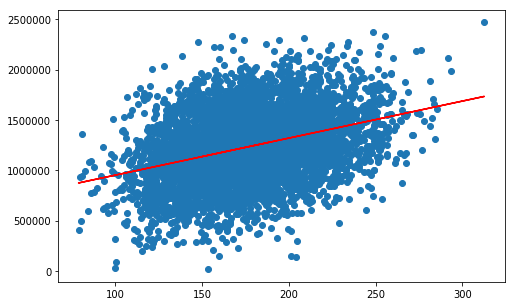

In [36]:
fig6 = plt.figure(figsize = (8,5))
plt.scatter(X,y)
plt.plot(X,y_predict_1,'r')
plt.show()

#### 2.我们用多因子研究下算法，考虑所有的特征。

In [56]:
# define X_multi
# data.drop(['Price'],axis=1)
X_multi = data.loc[: ,['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population','size']]
y = data.loc[: ,'Price']
X_multi.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size
0,79545.45857,5.317139,7.009188,23086.80050,188.214212
1,79248.64245,4.997100,6.730821,40173.07217,160.042526
2,61287.06718,5.134110,8.512727,36882.15940,227.273544
3,63345.24005,3.811764,5.586729,34310.24283,164.816630
4,59982.19723,5.959445,7.839388,26354.10947,161.966659


In [57]:
#set up the linear regression model
from sklearn.linear_model import LinearRegression
LR_multi = LinearRegression()
#train the model
LR_multi.fit(X_multi,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
y_predict_multi = LR_multi.predict(X_multi)
print(y_predict_multi)

[1223968.89166087 1497306.33188629 1250884.31019438 ... 1020693.92390376
 1260503.36914585 1302737.79157629]


In [59]:
#evaluate the model
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error_multi = mean_squared_error(y,y_predict_multi)
r2_score_multi = r2_score(y,y_predict_multi)
print(mean_squared_error_multi,r2_score_multi)

10219846512.177862 0.9180229195220739


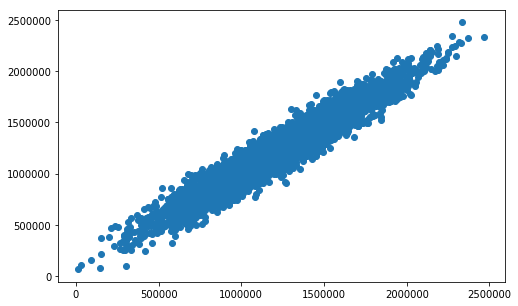

In [63]:
fig7 = plt.figure(figsize = (8,5))
plt.scatter(y,y_predict_multi)#对比y和y_predict_multi,这里我也不清楚，scatter都是x，y值画散点图，这里(x,y)位置分别用了两个y值，不是很明白。
plt.show()

#### 3.来用测试数据预测下房价。

In [66]:
X_test = [65000,5,5,30000,200]
X_test = np.array(X_test).reshape(1,-1)#X_test还不是矩阵，转np，然后reshape转一行多列。(1,-1)表示1行多列。
print(X_test)

[[65000     5     5 30000   200]]


In [67]:
y_test_predict = LR_multi.predict(X_test)
print(y_test_predict)

[817052.19516299]
